# Other rescalings

In [94]:
t, y, Y, k, m, M = var('t y Y k m M')
palette = [(215/255, 0/255, 132/255), (255/255, 1/255, 73/255), (255/255, 121/255, 1/255), (255/255, 210/255, 0/255)]
cool_palette = [(0/255, 150/255, 173/255), (0/255, 200/255, 146/255)]
grid_gray = (2/3, 2/3, 2/3)

## A (projective) homogeneous equation

$$\begin{align*}
y' & = \frac{y}{t + y} = \frac{y/t}{1 + y/t} \\
Y(t) & = y(t)/t \\
Y' & = y'/t - y/t^2 \\
& = (y' - Y)/t \\
& = \left(\frac{Y}{1 + Y} - Y\right)\frac{1}{t} \\
& = \left(\frac{-Y^2}{1 + Y}\right)\frac{1}{t} \\
\left(\frac{1}{Y^2} + \frac{1}{Y}\right)Y' & = -\frac{1}{t}
\end{align*}$$

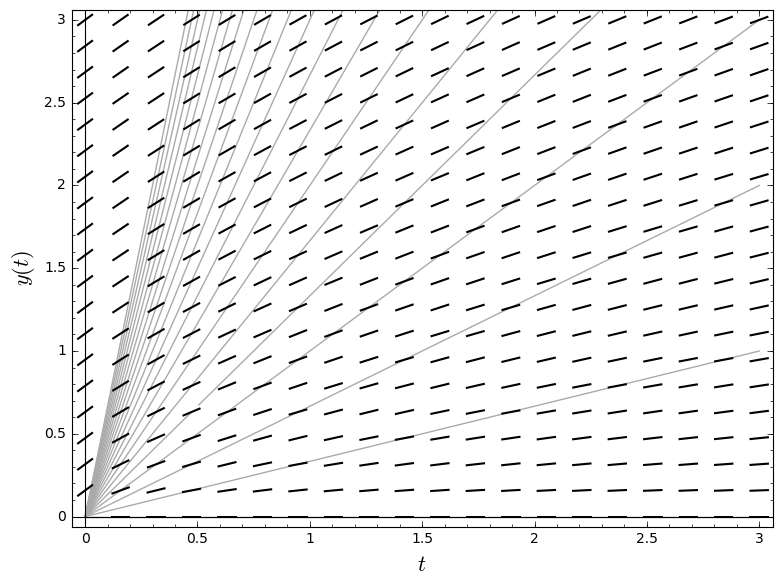

In [95]:
homog_grid = sum([plot(n/3 * t, (t, 0, 3), ymax = 3, rgbcolor = grid_gray, zorder = 0) for n in range(21)])
homog_direction = plot_slope_field(y/(t + y), (t, 0, 3), (y, 0, 3))
homog_labels = ["$t$", "$y(t)$"]
show(homog_direction + homog_grid, axes_labels = homog_labels)

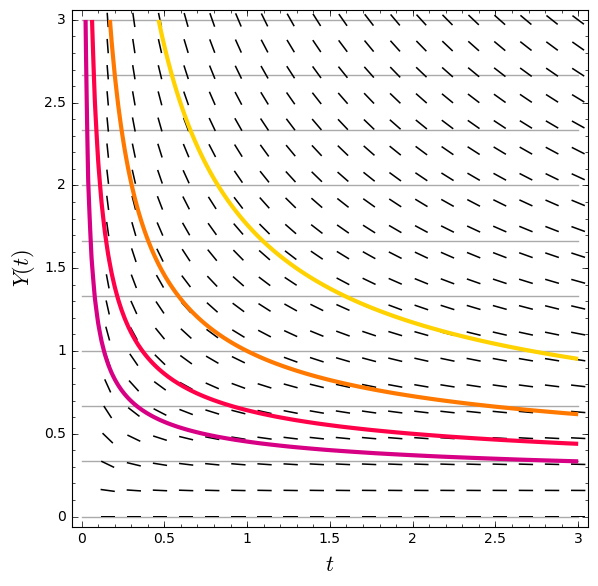

In [98]:
scaled_homog_grid = sum([plot(n/3, (t, 0, 3), rgbcolor = grid_gray, zorder = 0) for n in range(10)])
scaled_homog_direction = plot_slope_field(-Y^2/(1 + Y) * (1/t), (t, 0, 3), (Y, 0, 3))
scaled_homog_solutions = [implicit_plot(-1/Y + log(Y*t) + (3-n), (t, 0, 3), (Y, 0, 3), linewidth = 3, color = palette[n]) for n in range(4)]
scaled_homog_labels = ["$t$", "$Y(t)$"]
show(scaled_homog_direction + scaled_homog_grid + sum(scaled_homog_solutions), axes_labels = scaled_homog_labels)

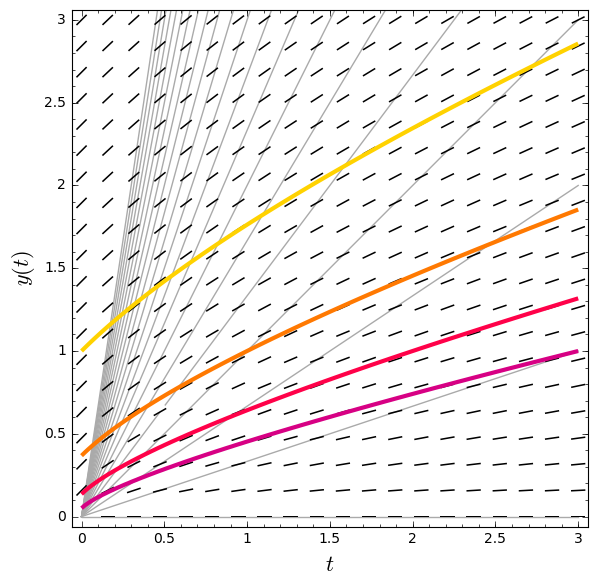

In [99]:
homog_solutions = [implicit_plot(-t/y + log(y) + (3-n), (t, 0, 3), (y, 0, 3), linewidth = 3, color = palette[n]) for n in range(4)]
show(homog_direction + homog_grid + sum(homog_solutions), axes_labels = homog_labels)

## Economic growth

One way to measure the size of an economy is to look at its stock of capital—the stuff you use to make more stuff. Let's say $k(t)$ is the amount of capital in Canada $t$ years after the year 2000. In the "Solow-Swan model" of economic growth, an economy produces new capital at a rate that depends on the amount of capital and the amount of labor available. Let's assume the amount of labor is proportional the population, $l(t) = e^{t/80}$. Old capital wears out at a rate proportional to the amount of capital. Overall, the stock of capital changes something like this:

$$\begin{align*}
k'(t) & = \tfrac{1}{8} l(t)^{1/4} k(t)^{3/4} - \tfrac{1}{10} k(t) \\
& = \tfrac{1}{8} e^{t/320}\,k(t)^{3/4} - \tfrac{1}{10} k(t).
\end{align*}$$

This is an example of a "Bernoulli equation."

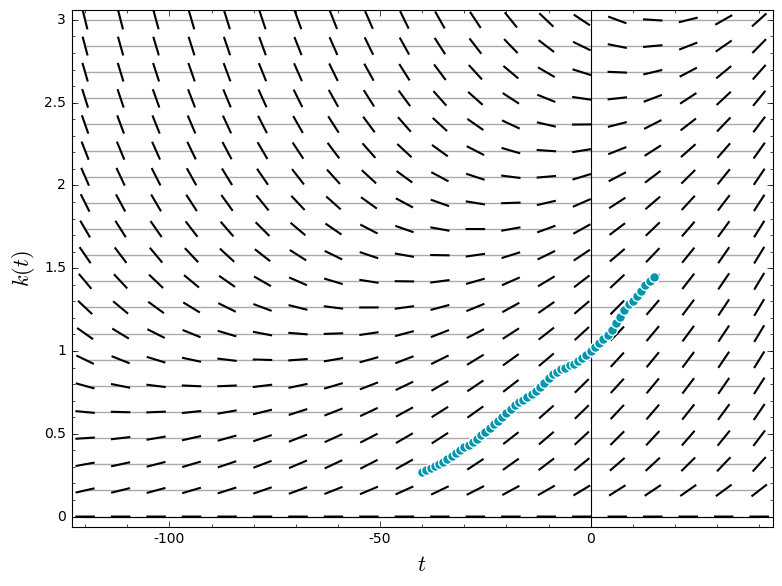

In [7]:
capital_grid = sum([plot((3/19)*n, (t, -120, 40), rgbcolor = grid_gray, zorder = 0) for n in range(20)])
capital_direction = plot_slope_field((1/8)*exp(t/320)*k^(3/4) - (1/10)*k, (t, -120, 40), (k, 1e-6, 3))
capital_labels = ["$t$", "$k(t)$"]
show(capital_direction + capital_grid + capital_scatter, axes_labels = capital_labels)

You can solve a general Bernoulli equation

$$k'(t) = p(t)\,k(t) + q(t)\,k(t)^\alpha$$

by looking at a new unknown function $m(t) = k(t)^{1-\alpha}$. In our case, $m(t) = k(t)^{1/4}$, and

$$4 m'(t) = \tfrac{1}{8} e^{t/320} - \tfrac{1}{10} m(t).$$

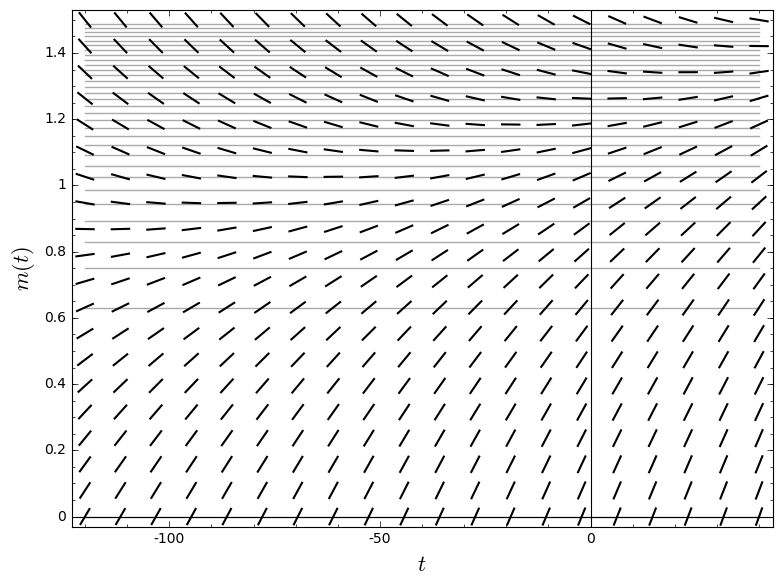

In [39]:
squashed_capital_grid = sum([plot(((3/19)*n)^(1/4), (t, -120, 40), rgbcolor = grid_gray, zorder = 0) for n in range(1.5^4*19/3)])
squashed_capital_direction = plot_slope_field((1/32)*exp(t/320) - (1/40)*m, (t, -120, 40), (m, 1e-6, 1.5))
squashed_capital_labels = ["$t$", "$m(t)$"]
show(squashed_capital_direction + squashed_capital_grid, axes_labels = squashed_capital_labels)

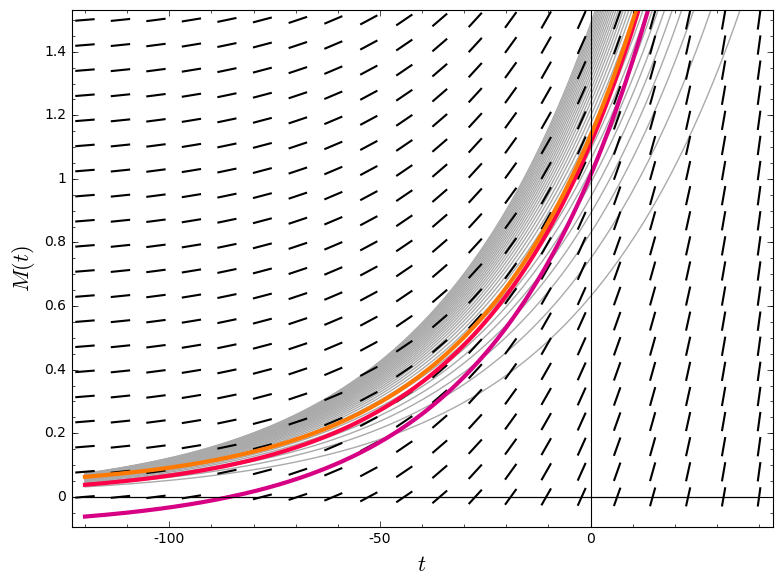

In [49]:
scaled_squashed_capital_grid = sum([plot(((3/19)*n)^(1/4) * exp(t/40), (t, -120, 40), ymax = 1.5, rgbcolor = grid_gray, zorder = 0) for n in range(1.5^4*19/3)])
scaled_squashed_capital_direction = plot_slope_field((1/32)*exp(t/40)*exp(t/320), (t, -120, 40), (M, 1e-6, 1.5))
scaled_squashed_capital_solutions = [plot((1/8)/(1/80 + 1/10)*exp(t/40)*exp(t/320) + cval, (t, -120, 40), thickness = 3, color = palette[p]) for (cval, p) in [(-1/10, 0), (0, 1), (1/40, 2)]]
scaled_squashed_capital_labels = ["$t$", "$M(t)$"]
show(scaled_squashed_capital_direction + scaled_squashed_capital_grid + sum(scaled_squashed_capital_solutions), axes_labels = scaled_squashed_capital_labels)

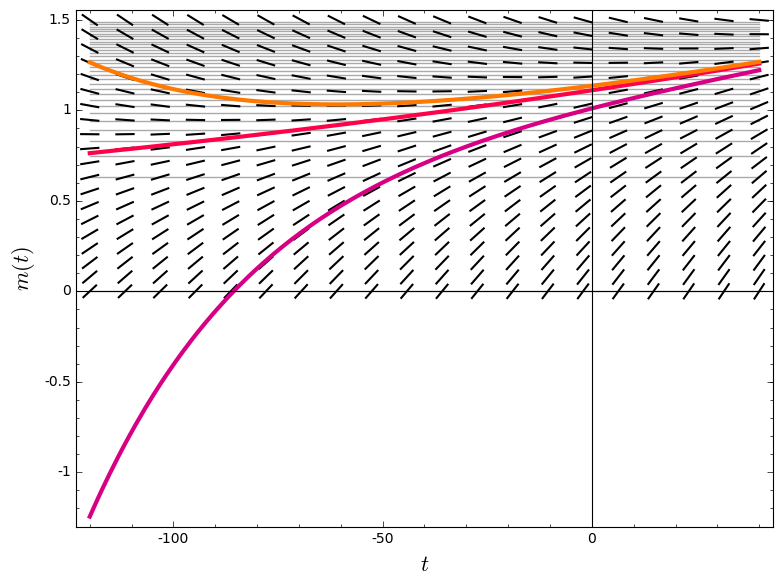

In [46]:
squashed_capital_solutions = [plot((1/8)/(1/80 + 1/10)*exp(t/320) + cval*exp(-t/40), (t, -120, 40), thickness = 3, color = palette[p]) for (cval, p) in [(-1/10, 0), (0, 1), (1/40, 2)]]
show(squashed_capital_direction + squashed_capital_grid + sum(squashed_capital_solutions), axes_labels = squashed_capital_labels)

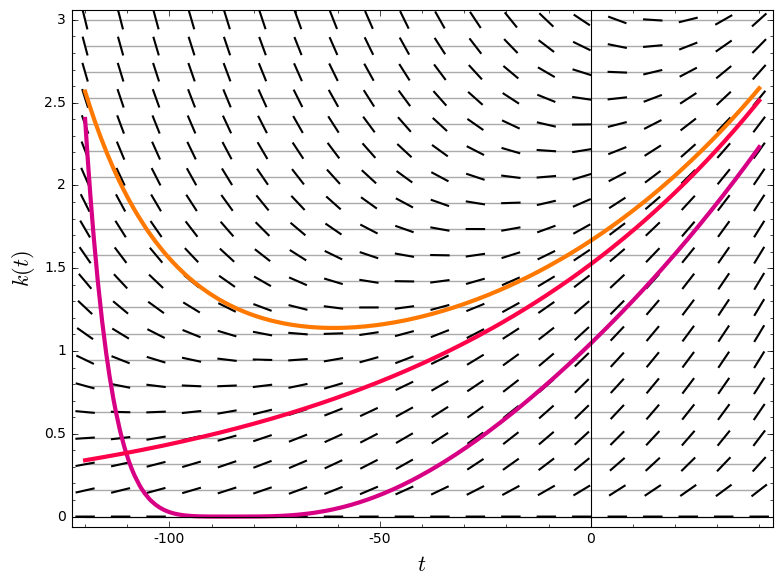

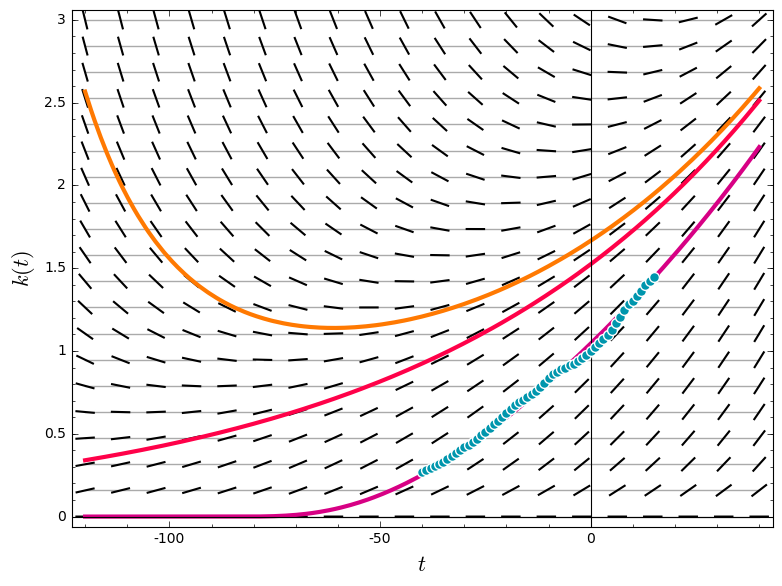

In [52]:
capital_solutions = [plot(capital_model.substitute(a = 1/8, d = 1/10, c = cval), (t, -120, 40), thickness = 3, rgbcolor = palette[p]) for (cval, p) in [(-1/10, 0), (0, 1), (1/40, 2)]]
low_solution_zero = -log(100/9)/(1/320 + 1/40)
correct_low_solution = plot(piecewise([((-infinity, low_solution_zero), 0), ((low_solution_zero, infinity), capital_model.substitute(a = 1/8, d = 1/10, c = -1/10))]), (t, -120, 40), thickness = 3, rgbcolor = palette[0])
show(capital_direction + capital_grid + sum(capital_solutions), axes_labels = capital_labels, ymax = 3)
show(capital_direction + capital_scatter + capital_grid + correct_low_solution + sum(capital_solutions[1:3]), axes_labels = capital_labels)

{d: 0.09596375645200887, c: -0.0980007529616743, a: 0.12013419676035972}


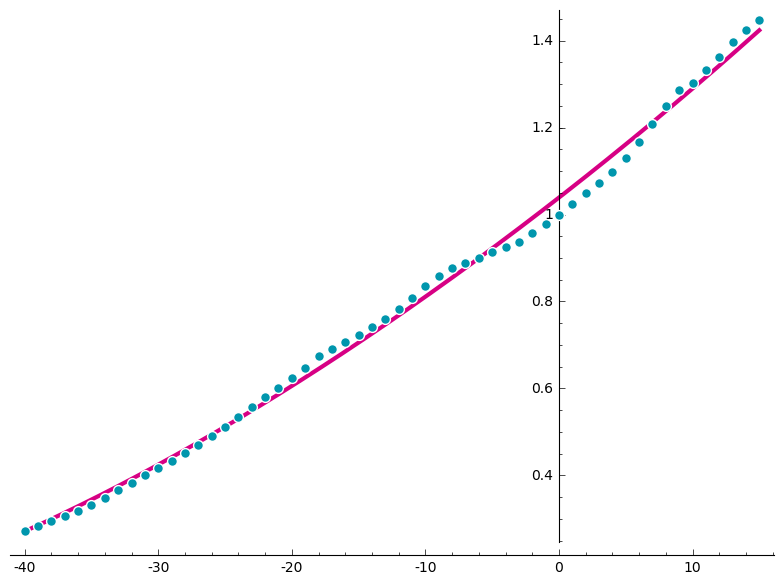

In [3]:
abs_gov_capital_series = [183.92, 191.30, 198.97, 207.75, 216.30, 224.81, 234.93, 246.31, 257.63, 268.82, 279.24, 288.92, 300.47, 311.29, 320.65, 330.05, 339.84, 348.51, 357.19, 365.22, 372.39, 379.63, 387.15, 394.81, 402.24, 410.70, 421.01, 430.42, 439.70, 449.87, 461.31, 473.77, 486.73, 498.63, 510.37, 522.54, 533.92, 543.82, 551.27, 558.51, 568.67, 579.33, 593.25, 607.68, 622.64, 639.25, 659.02, 679.68, 702.34, 726.26, 753.81, 786.68, 812.71, 835.36, 852.80, 870.19]
abs_priv_capital_series = [434.15, 451.53, 468.78, 485.80, 503.86, 527.26, 554.22, 585.07, 613.37, 640.02, 668.75, 696.29, 725.82, 756.93, 794.01, 833.62, 874.78, 918.18, 959.92, 1000.45, 1045.72, 1091.84, 1143.69, 1175.52, 1203.07, 1229.19, 1260.55, 1294.20, 1336.56, 1387.02, 1439.22, 1478.23, 1504.20, 1522.06, 1534.55, 1553.46, 1566.75, 1586.92, 1624.95, 1663.51, 1703.42, 1746.94, 1791.03, 1829.56, 1872.56, 1926.79, 1992.92, 2065.67, 2134.74, 2196.35, 2207.06, 2238.77, 2282.94, 2336.43, 2382.22, 2420.13]
abs_capital_series = [kgov + kpriv for (kgov, kpriv) in zip(abs_gov_capital_series, abs_priv_capital_series)]
rel_capital_series = [ktot / abs_capital_series[40] for ktot in abs_capital_series]
capital_data = zip(range(-40, 16), rel_capital_series)
capital_scatter = scatter_plot(capital_data, edgecolor = (1, 1, 1), facecolor = cool_palette[0])
a, d, c = var('a d c')
capital_model(t) = (a/(1/80 + d) * exp(t/320) + c * exp(-(d/4)*t))^4
fit = find_fit(capital_data, capital_model, parameters = [a, d, c], initial_guess = [1/15, 1/20, 0], solution_dict = True)
print(fit)
show(capital_scatter + plot(capital_model.substitute(fit), (t, -40, 15), thickness = 3, rgbcolor = palette[0]))